# Read Dataset

In [26]:
import kagglehub
import pandas as pd

# Download dataset -> return path folder di local
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

# Load CSV dari folder yang sudah di-download
df = pd.read_csv(path + "/retail_sales_dataset.csv")

print("First 5 records:")
print(df.head())

First 5 records:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


# Data Cleaning

In [27]:
print(df.shape)
print(df.info)
print(df.describe)

(1000, 9)
<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  To

In [28]:
df_null= df.isnull()
print(df_null)
print((df_null).sum())

     Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  Total Amount  
0       False           False         Fal

In [29]:
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df['MonthYear'] = df['Date'].dt.to_period('M')

# Data Analyst And Visualization

## 1. Monthly Sales

In [31]:
monthly_sales = df.groupby('MonthYear')['Total Amount'].sum()
print('Total Penjualan Setiap Bulan:')
print(monthly_sales)

Total Penjualan Setiap Bulan:
MonthYear
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


Text(0.5, 1.0, 'Grafik Penjualan Tiap Bulan')

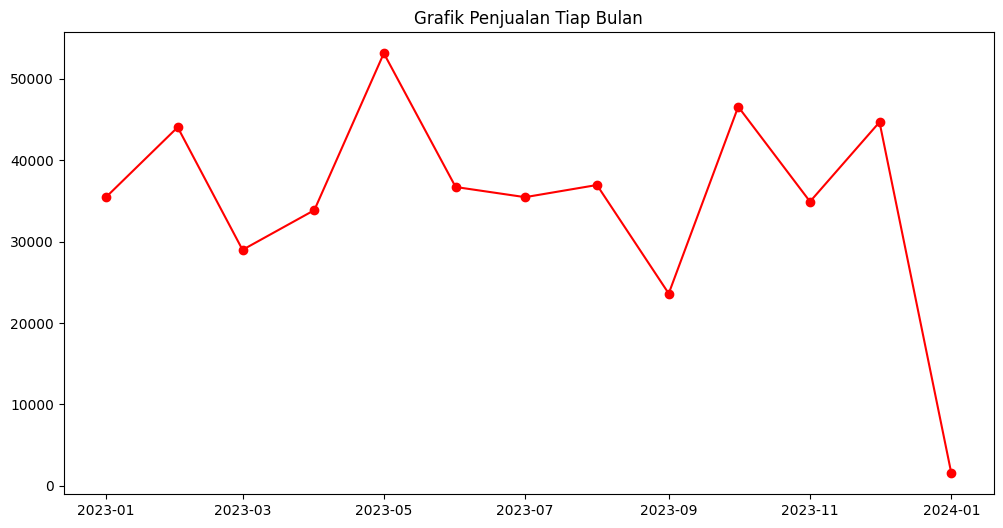

In [32]:
import matplotlib.pyplot as plt
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o', color='red')
plt.title('Grafik Penjualan Tiap Bulan')

### Insight
1. Puncak penjualan sepanjang tahun 2023 terjadi pada bulan Mei, menunjukkan adanya momen musiman atau event tertentu yang mendorong kenaikan transaksi pada periode tersebut.
2. Secara tren, penjualan mengalami penurunan dari tahun ke tahun, dengan penurunan paling signifikan terjadi pada tahun 2024. Hal ini dapat menjadi perhatian untuk mengevaluasi strategi penjualan atau faktor eksternal yang memengaruhi daya beli konsumen.

## 2. Product Sales

In [33]:
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print('Total penjualan setiap produk')
print(product_sales)

Total penjualan setiap produk
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


Text(0.5, 1.0, 'Grafik Total Penjualan Tiap Produk')

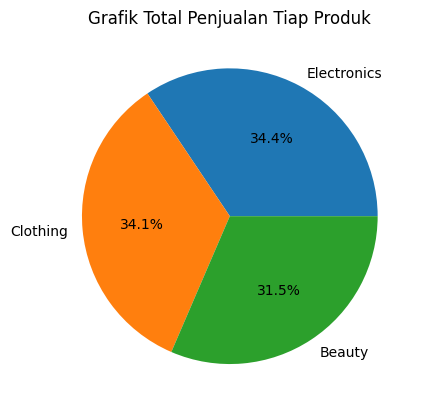

In [34]:
plt.pie(product_sales,
       labels= product_sales.index,
       autopct='%1.1f%%')
plt.title('Grafik Total Penjualan Tiap Produk')

Text(0.5, 1.0, 'Grafik Total Penjualan Berdasarkan Produk')

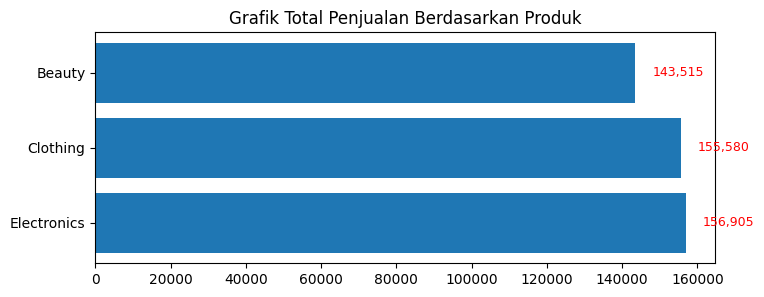

In [35]:
plt.figure(figsize=(8,3))
bars=plt.barh(product_sales.index,
        product_sales.values)

# tambahkan total
total = product_sales.sum()
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01*total), 
             bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}", 
             va='center', fontsize=9, 
             color='red')
    
plt.title('Grafik Total Penjualan Berdasarkan Produk')

### Insight
1. Produk Electronics menjadi kategori dengan penjualan tertinggi, yaitu sebesar 34,4% dari total penjualan atau sekitar 156.905 unit.
→ Hal ini menunjukkan bahwa produk elektronik merupakan kategori yang paling diminati konsumen, sehingga berpotensi menjadi fokus utama dalam strategi penjualan.

## 3. Total Sales by Gender 

In [36]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()
print('Total Penjualan Berdasarkan Gender')
print(gender_sales)

Total Penjualan Berdasarkan Gender
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


Text(0.5, 1.0, 'Grafik Total Penjualan Berdasarkan Gender')

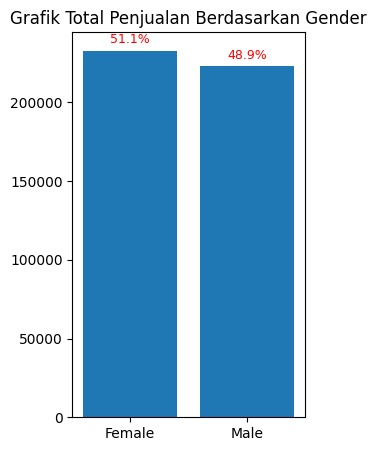

In [37]:
plt.figure(figsize=(3,5))
plt.bar(gender_sales.index,
        gender_sales.values)

# hitung persentase
total = gender_sales.sum()
for i, v in enumerate(gender_sales.values):
    persen = v/total*100
    plt.text(i, v + (0.01*total), 
             f"{persen:.1f}%", 
             ha='center', fontsize=9, 
             color='red')
    
plt.title('Grafik Total Penjualan Berdasarkan Gender')

### Insight
1. Sebagian besar produk dibeli oleh pelanggan perempuan, meskipun selisih persentasenya dibandingkan pelanggan laki-laki tidak terlalu signifikan. Hal ini menunjukkan bahwa strategi pemasaran bisa tetap diarahkan untuk kedua gender, namun fokus bisa lebih ditekankan pada gender perempuan untuk mengoptimalkan penjualan produk.

## 4. Analisis by Product Favorite

In [38]:
fav_product = df.groupby(['Gender','Product Category'])['Total Amount'].sum().sort_values(ascending=False).reset_index()
print('Produk terfavorit')
print(fav_product)

Produk terfavorit
   Gender Product Category  Total Amount
0  Female         Clothing         81275
1    Male      Electronics         80170
2  Female      Electronics         76735
3  Female           Beauty         74830
4    Male         Clothing         74305
5    Male           Beauty         68685


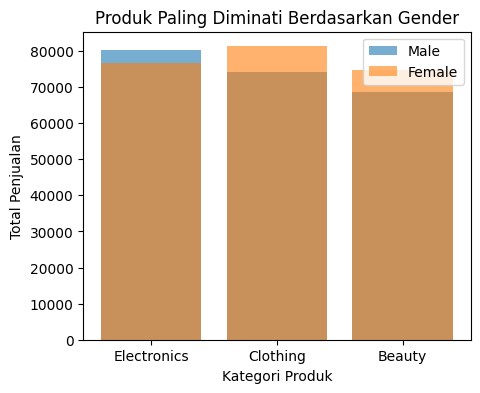

In [39]:
plt.figure(figsize=(5,4))
for gender in df['Gender'].unique():
    subset = fav_product[fav_product['Gender'] == gender]
    plt.bar(subset["Product Category"], subset["Total Amount"], alpha=0.6, label=gender)

plt.title("Produk Paling Diminati Berdasarkan Gender")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Penjualan")
plt.legend()
plt.show()

### Insight
1. Berdasarkan segmentasi gender, produk pakaian lebih banyak diminati oleh pelanggan perempuan, sedangkan produk elektronik lebih disukai oleh pelanggan laki-laki.
2. Hal ini berarti perusahaan tidak hanya perlu menjaga dominasi elektronik, namun juga meningkatkan potensi penjualan pakaian sebagai pasar terbesar perempuan.

## 5. Analisis by Age Group

In [40]:
bins = [0, 19, 29, 39, 49, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df["Gender"] = df["Gender"].astype("category")
df["AgeGroup"] = df["AgeGroup"].astype("category")

age_group_sales = df.groupby('AgeGroup',observed=True)['Total Amount'].sum()
print(age_group_sales)

AgeGroup
<20       26085
20-29     97070
30-39     96325
40-49     93365
50+      143155
Name: Total Amount, dtype: int64


### Insight
1. Produk paling diminati oleh pelanggan dengan usia 50 tahun ke atas

## 6. Repeat vs One-time Customer

In [41]:
cust_freq = df.groupby('Customer ID')['Transaction ID'].count()
print('Frequensi Pembelian Oleh Customer')
print(cust_freq.value_counts())

Frequensi Pembelian Oleh Customer
Transaction ID
1    1000
Name: count, dtype: int64


In [42]:
cust_sales = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
print('Total Pembelian Customer')
print(cust_sales)

Total Pembelian Customer
Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
           ... 
CUST309      25
CUST907      25
CUST285      25
CUST242      25
CUST657      25
Name: Total Amount, Length: 1000, dtype: int64


### Insight
1. Total pembelian terbesar oleh customer adalah 2000 dolar dan terkecil adalah 25 dolar
2. Tidak ada pembelian berulang, karena data menunjukkan bahwa semua transaksi berasal dari Customer ID yang berbeda dengan total 1000 transaksi.
3. Perlunya analisis lanjut untuk transaksi dengan jangka lebih panjang untuk mengetahui loyalitas customer dan penekanan pada penggunaan membership untuk mengetahui customer yang sama pada transaksi yang berbeda.

# Rekomendasi Startegi
1. Fokus pada produk unggulan (Electronics & Clothing) dengan strategi marketing yang sesuai segmen gender.
2. Optimalkan *seasonal campaign* di bulan-bulan kuat (misal menjelang Mei).
3. Targetkan pelanggan usia 50+ sebagai segmen prioritas.
4. Rancang program loyalitas untuk meningkatkan repeat purchase (misalnya membership / diskon khusus pelanggan lama).